In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pyproj as Proj

In [40]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [41]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

capitals.head()

<ipython-input-41-1c977dbda660>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-41-1c977dbda660>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


<AxesSubplot:>

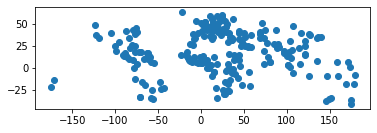

In [42]:
capitals.plot()

<AxesSubplot:>

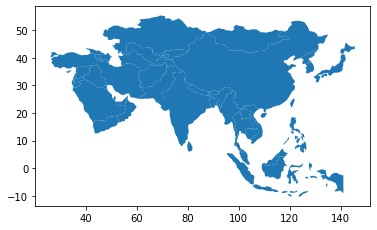

In [43]:
Asia = world[world['continent'] == 'Asia']
Asia.plot()

<AxesSubplot:>

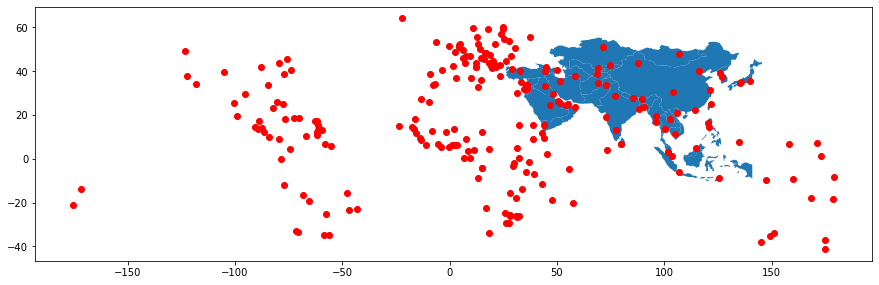

In [44]:
fig,ax = plt.subplots(figsize=(15,10))
Asia.plot(ax = ax)
capitals.plot(ax = ax, color='red')

In [45]:
capitals = capitals.to_crs("epsg:3395")
Asia = Asia.to_crs('epsg:3395');

In [46]:
capitals['geometry'] = capitals.buffer(500000)

In [47]:
capitals.head()

,name,geometry
0,Vatican City,"POLYGON ((1886304.644 5117957.427, 1883897.007..."
1,San Marino,"POLYGON ((1885011.523 5425900.271, 1882603.887..."
2,Vaduz,"POLYGON ((1559390.803 5932596.005, 1556983.166..."
3,Lobamba,"POLYGON ((3973167.790 -3037957.646, 3970760.15..."
4,Luxembourg,"POLYGON ((1182388.790 6346728.175, 1179981.154..."


<AxesSubplot:>

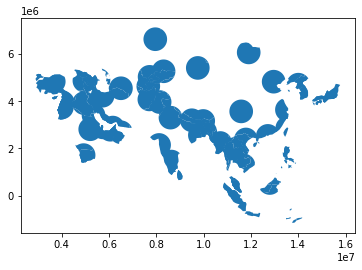

In [48]:
asia_cores = gpd.overlay(Asia, capitals, how = 'intersection')
asia_cores.plot()

<AxesSubplot:>

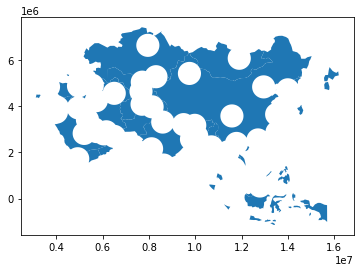

In [49]:
asia_cores = gpd.overlay(Asia, capitals, how = 'difference')
asia_cores.plot()